<a href="https://colab.research.google.com/github/sayantan1410/Digit_Classifier/blob/master/Face_recognition_with_python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=34f75cabd99bb96fc19d4c0d0cf26d3e63e9fa5666ec6a72d1751cb6a6e33819
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [ ]:
pwd

'/content/drive/My Drive'

**Initialization**1`

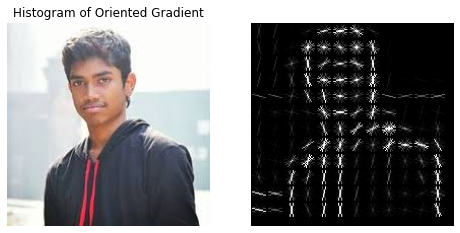

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure 
import cv2

image = cv2.imread('download.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fd, hog_image = hog(image,orientations = 8, pixels_per_cell = (16,16), cells_per_block=(1,1),visualize = True, multichannel= True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharex = True, sharey = True)
ax1.axis('off')
ax1.imshow(image, cmap= plt.cm.gray)
ax1.set_title('Input Image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap= plt.cm.gray)
ax1.set_title('Histogram of Oriented Gradient')
plt.show()


In [ ]:
image.shape

(200, 200, 3)

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np 
import cv2 ##openCV
%matplotlib inline


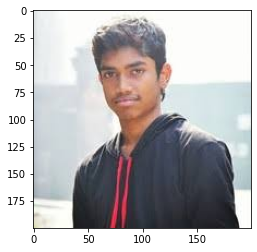

In [ ]:
image = cv2.imread('download.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.imshow(image)

In [ ]:
face_locations = face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print('found {} faces in input image' .format(number_of_faces))

found 1 faces in input image


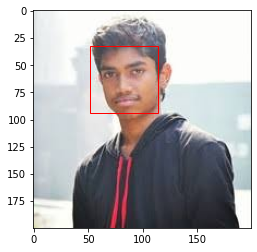

In [ ]:
plt.imshow(image)
ax = plt.gca()
for face_locations in face_locations:
  top, right, bottom, left = face_locations
  x,y,w,h = left, top, right, bottom
  rect = Rectangle((x,y), w-x,h-y, fill=False, color='red')
  ax.add_patch(rect)
  plt.show()

In [ ]:
image = cv2.imread('download.jpg')
me = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.imread('eminem.jpg')
eminem = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.imread('kohli.jpg')
kohli = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
face_demo_encoding = face_recognition.face_encodings(me)[0]
kohli_encoding = face_recognition.face_encodings(kohli)[0]
eminem_encoding = face_recognition.face_encodings(eminem)[0]

known_face_encodings = [
                        face_demo_encoding, kohli_encoding, eminem_encoding 
]


found my picture in the photo


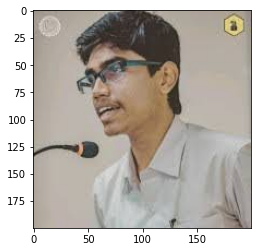

In [ ]:
image = cv2.imread('me.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)
unknown_image_encodings = face_recognition.face_encodings(unknown_image)
from scipy.spatial import distance 
for ufe in unknown_image_encodings:
  results = []
  for kfe in known_face_encodings:
    d = distance.euclidean(kfe,ufe)
    results.append(d)
  thresold = 0.6
  results = np.array(results)<= thresold
  name = "unknown"
  if results[0]:
    name = "my picture"
  elif results[1]:
    name = " Eminem picture"
  elif results[2]:
    name = " kohli"
  print(f"found {name} in the photo")